In [1]:
# Import necessary libraries for the project
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Read in the data stored in .xlsx file into pandas dataframe 
df_term_deposit_marketing = pd.read_csv("./train.csv")

### DATA WRANGLING

In [3]:
# Look at first 5 rows of data
print(df_term_deposit_marketing.head())
print('\n')
# Look at the structure of the data
print(df_term_deposit_marketing.info())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

Discussion:

Based on results above, we can see that all the 18 columns are non-null for all the 31647 rows. Since the data was obtained from Kaggle, the data was clean i.e. there were no missing or null values and hence there was not much to do in terms of treating missing values or null values. 

In [4]:
# Look at summary stats of the numerical data
print(df_term_deposit_marketing.describe())

                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.00

Discussion:
    
Based on results above, we can see that:

i)age (i.e. age of client) varies from 18 years to 95 years which is reasonable since clients can live upto  95years. 

ii)balance (i.e. outstanding balance) varies from -8019 to 102127 which is reasonable. It is possible for some clients to have negative balance

iii)day (i.e. day of week of contact) varies from 1 to 31 which is reasonable since maximum number of days in a month is 31

iv)duration (i.e. contact duration) varies from 0 to 4918 secs which is reasonable since 4918/3600 secs is 1.36hrs. One to two hours is reasonable timeframe for contact duration.

v)campaign( i.e. number of contacts performed during this campaign to the client) varies from 1 to 63. 63 seems high, so this needs to be investigated further

vi)pdays (i.e. number of days that passed by after the client was last contacted) varies from -1 to 871 days.  871/364 is about 2.39 years which is possible since banks may not be in touch with the clients for few years. 

vii)previous (i.e. number of contacts performed before this campaign) varies from 0 to 275. 275 seems high, so this needs to be investigated further


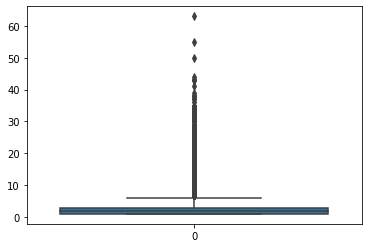

In [5]:
sns.boxplot(data=df_term_deposit_marketing['campaign'])

Based on boxplot above, we can see that 63 seems to lie on the continum of the values. So, there is no need to treat it any differently.

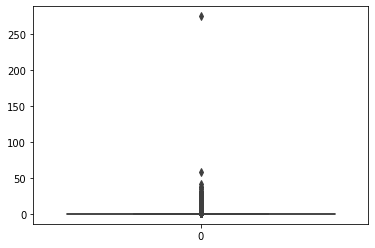

In [6]:
sns.boxplot(data=df_term_deposit_marketing['previous'])

Discussion:

Based on boxplot above, we can see that 275 lies far away from other values. So we can treat it as a potential wrong/incorrect value. The data point/row corresponding to df_term_deposit_marketing[‘previous’] = 275 can potentially be removed. However for this case, I leave it as it is since it is a possible value (i.e if a customer is a longtime customer, it is possible that the customer can be contacted for 275 times prior to this campaign)

Overall, there isn't much data wrangling to do wrt numerical columns.

In [45]:
# Look at value counts of categorial columns to see if there are any categories that are not well defined or
# have really high or really low value counts. 

print('Job:\n',df_term_deposit_marketing['job'].value_counts(),'\n')
print('Marital:\n', df_term_deposit_marketing['marital'].value_counts(),'\n')
print('Education:\n',df_term_deposit_marketing['education'].value_counts(),'\n')
print('Default:\n',df_term_deposit_marketing['default'].value_counts(),'\n')
print('Housing:\n',df_term_deposit_marketing['housing'].value_counts(),'\n')
print('Loan:\n',df_term_deposit_marketing['loan'].value_counts(),'\n')
print('Contact:\n',df_term_deposit_marketing['contact'].value_counts(),'\n')
print('Month:\n',df_term_deposit_marketing['month'].value_counts(),'\n')
print('Poutcome:\n',df_term_deposit_marketing['poutcome'].value_counts(),'\n')
print('Subscribed:\n',df_term_deposit_marketing['subscribed'].value_counts(),'\n')

Job:
 blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

Marital:
 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

Education:
 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

Default:
 no     31062
yes      585
Name: default, dtype: int64 

Housing:
 yes    17584
no     14063
Name: housing, dtype: int64 

Loan:
 no     26516
yes     5131
Name: loan, dtype: int64 

Contact:
 cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64 

Month:
 may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64 

Poutcome:
 unknown   

Discussion:

Based on results above, we can see that categories for the columns are well defined and value counts for them seem reasonable. So there is not much data wrangling to do wrt categorical columns.

### DATA STORY

In [8]:
# Now let's Look at box plots and histograms for numerical columns and barplots for categorical columns

(array([1.170e+02, 8.060e+02, 2.772e+03, 5.499e+03, 5.061e+03, 3.933e+03,
        2.480e+03, 3.097e+03, 2.679e+03, 2.322e+03, 2.056e+03, 2.510e+02,
        1.490e+02, 1.190e+02, 1.190e+02, 9.700e+01, 6.600e+01, 1.500e+01,
        5.000e+00, 4.000e+00]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <a list of 20 Patch objects>)

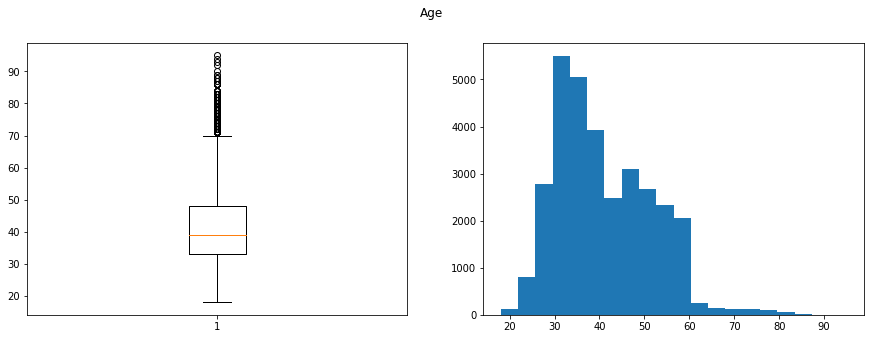

In [9]:
# Start with box plots and histograms for numerical columns first ( all of them are independent variables)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Age')
ax1.boxplot(df_term_deposit_marketing['age'])
ax2.hist(df_term_deposit_marketing['age'], bins=20)

(array([7.0000e+00, 2.7692e+04, 3.1600e+03, 5.1500e+02, 1.3600e+02,
        6.8000e+01, 2.9000e+01, 1.1000e+01, 9.0000e+00, 7.0000e+00,
        3.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -8019. ,  -2511.7,   2995.6,   8502.9,  14010.2,  19517.5,
         25024.8,  30532.1,  36039.4,  41546.7,  47054. ,  52561.3,
         58068.6,  63575.9,  69083.2,  74590.5,  80097.8,  85605.1,
         91112.4,  96619.7, 102127. ]),
 <a list of 20 Patch objects>)

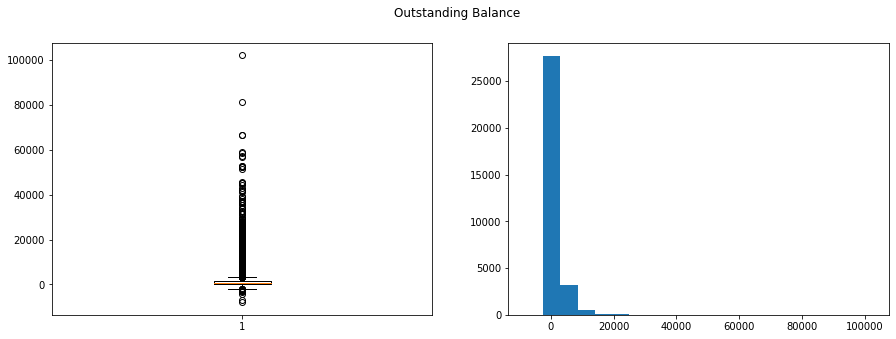

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Outstanding Balance')
ax1.boxplot(df_term_deposit_marketing['balance'])
ax2.hist(df_term_deposit_marketing['balance'], bins=20)

(array([1120.,  761., 2389., 1348., 2521., 1097., 1374., 1116., 2382.,
        1208., 2325., 1612., 3137., 1445., 1297.,  305., 1347.,  804.,
        2517., 1542.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ,
        17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. , 29.5, 31. ]),
 <a list of 20 Patch objects>)

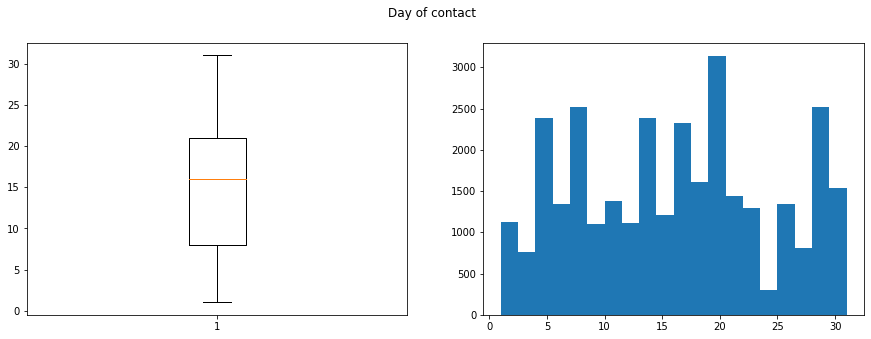

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Day of contact')
ax1.boxplot(df_term_deposit_marketing['day'])
ax2.hist(df_term_deposit_marketing['day'], bins=20)

(array([2.0388e+04, 7.3900e+03, 2.2200e+03, 8.8200e+02, 4.1600e+02,
        1.8400e+02, 8.2000e+01, 3.7000e+01, 2.2000e+01, 8.0000e+00,
        7.0000e+00, 1.0000e+00, 3.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  245.9,  491.8,  737.7,  983.6, 1229.5, 1475.4, 1721.3,
        1967.2, 2213.1, 2459. , 2704.9, 2950.8, 3196.7, 3442.6, 3688.5,
        3934.4, 4180.3, 4426.2, 4672.1, 4918. ]),
 <a list of 20 Patch objects>)

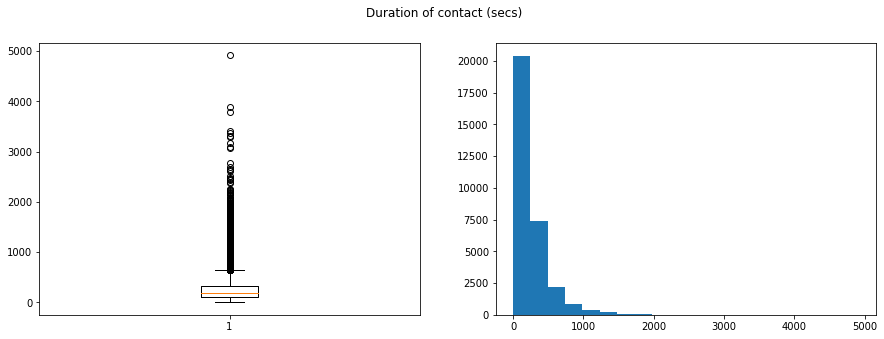

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Duration of contact (secs)')
ax1.boxplot(df_term_deposit_marketing['duration'])
ax2.hist(df_term_deposit_marketing['duration'], bins=20)

(array([2.736e+04, 2.679e+03, 7.760e+02, 3.210e+02, 1.830e+02, 1.190e+02,
        7.400e+01, 4.300e+01, 3.100e+01, 2.700e+01, 1.900e+01, 6.000e+00,
        2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ,
        35.1, 38.2, 41.3, 44.4, 47.5, 50.6, 53.7, 56.8, 59.9, 63. ]),
 <a list of 20 Patch objects>)

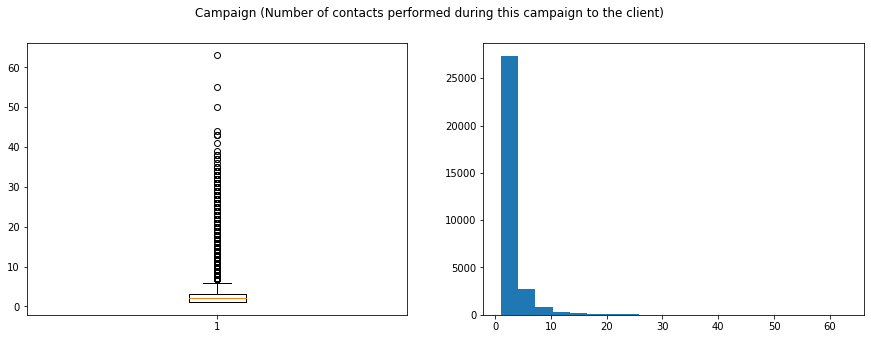

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Campaign (Number of contacts performed during this campaign to the client) ')
ax1.boxplot(df_term_deposit_marketing['campaign'])
ax2.hist(df_term_deposit_marketing['campaign'], bins=20)

(array([2.609e+04, 2.410e+02, 1.020e+03, 5.790e+02, 1.132e+03, 3.660e+02,
        5.750e+02, 6.820e+02, 7.930e+02, 4.200e+01, 4.400e+01, 1.800e+01,
        2.200e+01, 9.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 1.200e+01,
        6.000e+00, 4.000e+00]),
 array([ -1. ,  42.6,  86.2, 129.8, 173.4, 217. , 260.6, 304.2, 347.8,
        391.4, 435. , 478.6, 522.2, 565.8, 609.4, 653. , 696.6, 740.2,
        783.8, 827.4, 871. ]),
 <a list of 20 Patch objects>)

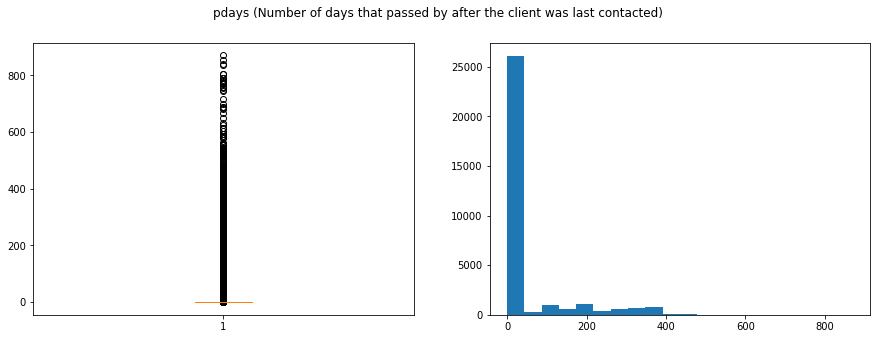

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('pdays (Number of days that passed by after the client was last contacted)')
ax1.boxplot(df_term_deposit_marketing['pdays'])
ax2.hist(df_term_deposit_marketing['pdays'], bins=20)

(array([3.1544e+04, 9.2000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.  ,  13.75,  27.5 ,  41.25,  55.  ,  68.75,  82.5 ,  96.25,
        110.  , 123.75, 137.5 , 151.25, 165.  , 178.75, 192.5 , 206.25,
        220.  , 233.75, 247.5 , 261.25, 275.  ]),
 <a list of 20 Patch objects>)

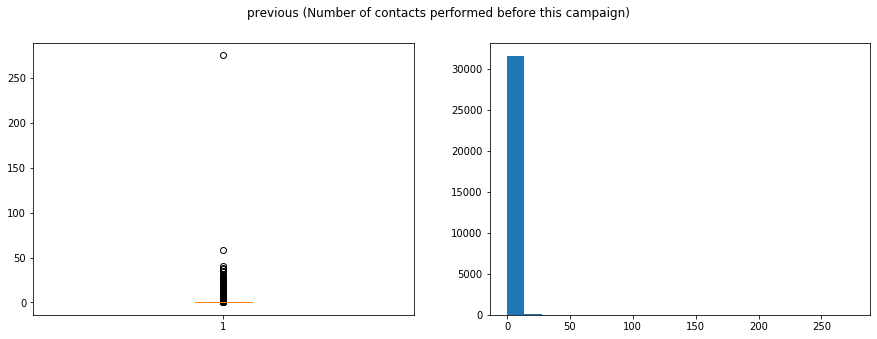

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('previous (Number of contacts performed before this campaign)')
ax1.boxplot(df_term_deposit_marketing['previous'])
ax2.hist(df_term_deposit_marketing['previous'], bins=20)

Discussion:

Based on graphs above, we can see that most of the numerical columns are not evenly distributed. Except "Age" and "Day of contact", they seem to be skewed i.e. distributed at one end of the x-axis or the other. Typically for skewed distributions, log transformations tend to be done to make them more normal like before feeding them into linear models. In this case, I leave them as they are since I will be feeding them primarly into non-linear classification models like random forests, gradient boosted trees, SVMs where there is no necessity for normal looking/like distributions. 

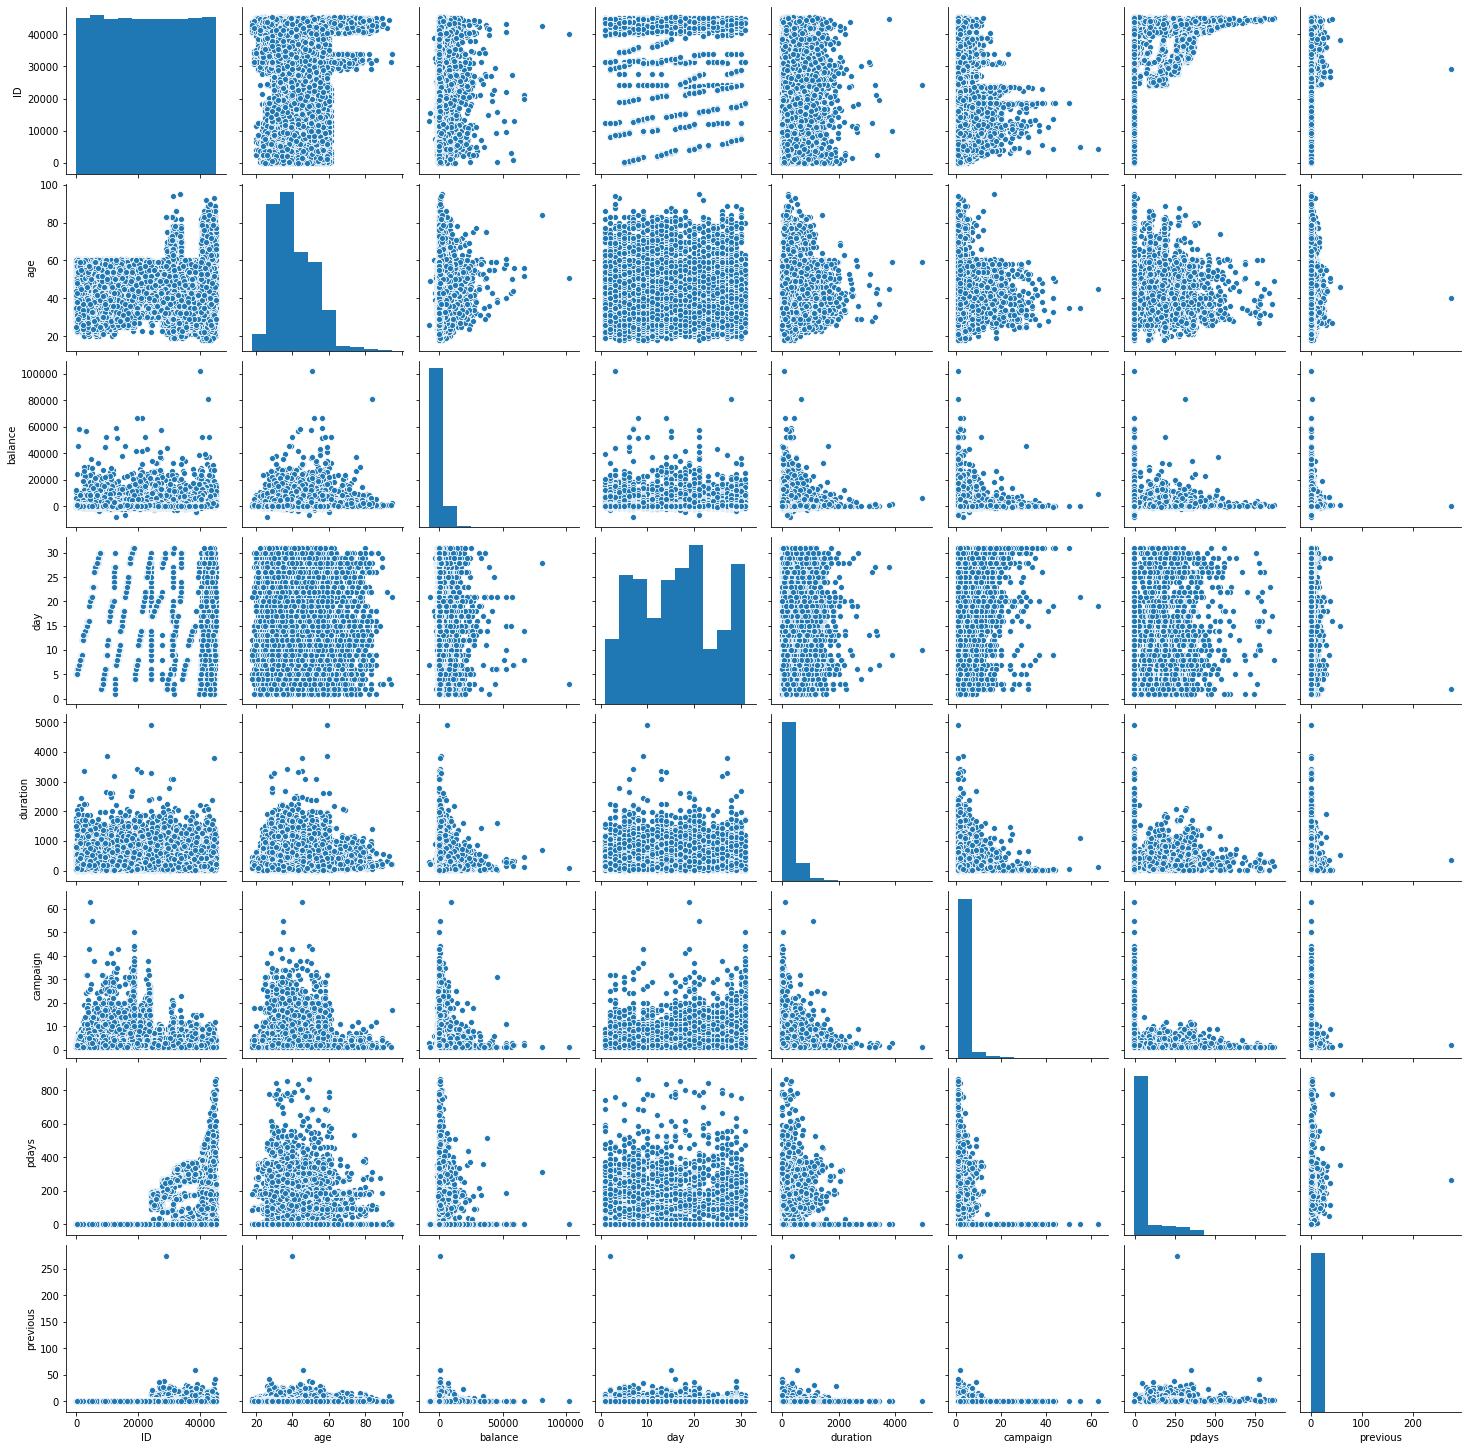

In [16]:
# Now lets look at scatterplot of numerical columns (all of them are independent variables) against each other to see 
# if there is any visible correlation amongnst them
sns.pairplot(df_term_deposit_marketing)

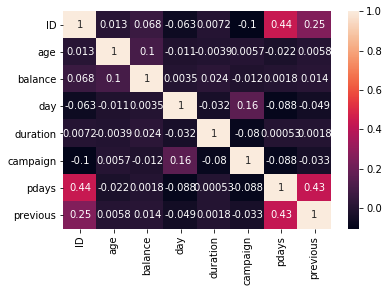

In [17]:
# We can replicate the above numerically by computing the correlation matrix and looking at corresponding heatmap to 
# identify any numerical columns that are correlated
corr_matrix =  df_term_deposit_marketing.corr()
sns.heatmap(corr_matrix,annot=True)

Discussion:

Based on plot and heatmap above, we can see that there is no visible or meaningful correlation amongst any of the 
numerical columns (all of them are independent variables). From heatmap, it seems that there is somewhat meaningful correlation of 0.43 between "pdays" and "previous' but looking at the pairplot for the correlation between those two doesn't seem to provide any meaningful association. So, based on this, we can deduce that there are no redundant numerical columns and hence all the numerical columns can be fed to the models. 

In [18]:
# Now lets look at barplots of categorical columns (All except "Subscribed" are independent variables. "Subscribed" is the 
# dependent/response variable)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

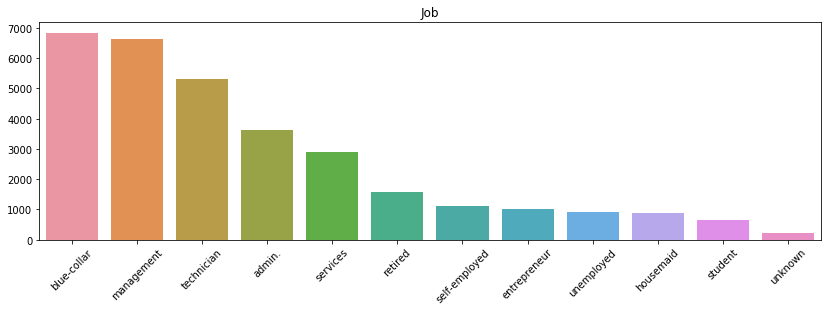

In [19]:
plt.figure(figsize=(14,4))
sns.barplot(x=df_term_deposit_marketing['job'].value_counts().index, 
            y=df_term_deposit_marketing['job'].value_counts().values)
plt.title("Job")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

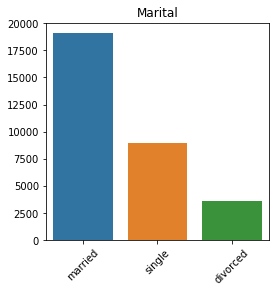

In [20]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['marital'].value_counts().index, 
            y=df_term_deposit_marketing['marital'].value_counts().values)
plt.title("Marital")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

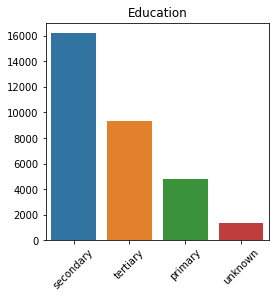

In [21]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['education'].value_counts().index, 
            y=df_term_deposit_marketing['education'].value_counts().values)
plt.title("Education")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

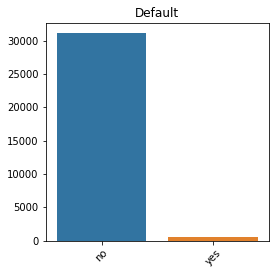

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['default'].value_counts().index, 
            y=df_term_deposit_marketing['default'].value_counts().values)
plt.title("Default")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

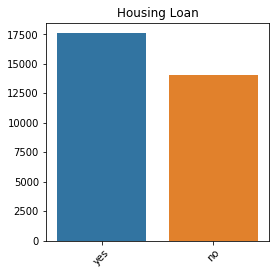

In [23]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['housing'].value_counts().index, 
            y=df_term_deposit_marketing['housing'].value_counts().values)
plt.title("Housing Loan")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

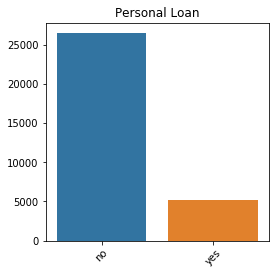

In [24]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['loan'].value_counts().index, 
            y=df_term_deposit_marketing['loan'].value_counts().values)
plt.title("Personal Loan")
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

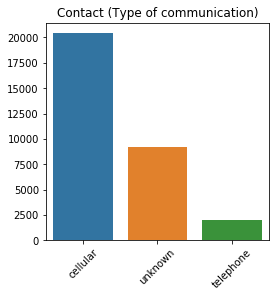

In [25]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['contact'].value_counts().index, 
            y=df_term_deposit_marketing['contact'].value_counts().values)
plt.title("Contact (Type of communication)")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

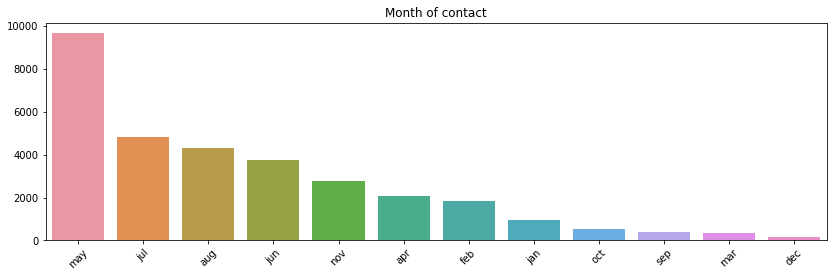

In [26]:
plt.figure(figsize=(14,4))
sns.barplot(x=df_term_deposit_marketing['month'].value_counts().index, 
            y=df_term_deposit_marketing['month'].value_counts().values)
plt.title("Month of contact")
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

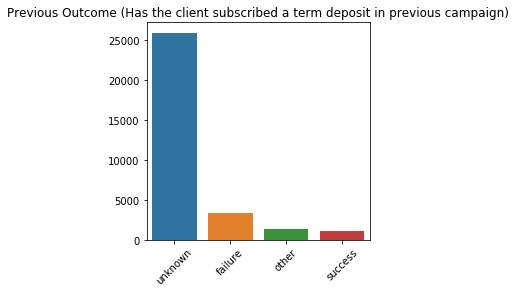

In [27]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['poutcome'].value_counts().index, 
            y=df_term_deposit_marketing['poutcome'].value_counts().values)
plt.title("Previous Outcome (Has the client subscribed a term deposit in previous campaign)")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

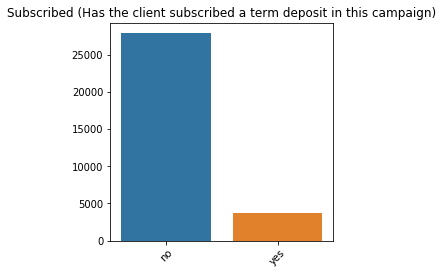

In [28]:
plt.figure(figsize=(4,4))
sns.barplot(x=df_term_deposit_marketing['subscribed'].value_counts().index, 
            y=df_term_deposit_marketing['subscribed'].value_counts().values)
plt.title("Subscribed (Has the client subscribed a term deposit in this campaign)")
plt.xticks(rotation=45)

Discussion:

Based on plots above, we can see that the categorial variables for the most part are well defined. The thing that needs to be accounted for is the imbalance of the response variable "subscribed" since it has lot more "no"s than "yes"s.

#### i) Data Processing

In [ ]:
# Now to get an initial sense of which of the independent variables have the most impact on the target/response variable 
# "Subscribed", lets run logistics regression and look at the coefficient values for the independent variables

# Before doing logistic regression, data would need to be processed in order to make it ready for logistic regression

In [30]:
# Do onehot encoding for categorical variables which have more than 2 labels.

onehot_job = pd.get_dummies(df_term_deposit_marketing['job'])
onehot_job.rename(columns={'unknown':'unknown_job'}, inplace=True)

onehot_marital = pd.get_dummies(df_term_deposit_marketing['marital'])

onehot_education = pd.get_dummies(df_term_deposit_marketing['education'])
onehot_education.rename(columns={'unknown':'unknown_education'}, inplace=True)

onehot_contact = pd.get_dummies(df_term_deposit_marketing['contact'])
onehot_contact.rename(columns={'unknown':'unknown_contact'}, inplace=True)

onehot_month = pd.get_dummies(df_term_deposit_marketing['month'])

onehot_poutcome = pd.get_dummies(df_term_deposit_marketing['poutcome'])
onehot_poutcome.rename(columns={'unknown':'unknown_poutcome'}, inplace=True)

df_onehot_term_deposit_marketing = pd.concat([df_term_deposit_marketing, onehot_job, onehot_marital, onehot_education, 
                                             onehot_contact, onehot_month, onehot_poutcome], axis=1)

df_onehot_term_deposit_marketing = df_onehot_term_deposit_marketing.drop(['job', 'marital','education','contact',
                                                                          'month','poutcome'],axis=1)


print(df_onehot_term_deposit_marketing.columns)
df_onehot_term_deposit_marketing.head()

Index(['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'subscribed', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'unknown_job',
       'divorced', 'married', 'single', 'primary', 'secondary', 'tertiary',
       'unknown_education', 'cellular', 'telephone', 'unknown_contact', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'failure', 'other', 'success', 'unknown_poutcome'],
      dtype='object')


,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown_poutcome
0,26110,56,no,1933,no,no,19,44,2,-1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,no,3,no,no,20,91,2,-1,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,no,891,yes,no,18,240,1,-1,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,no,3287,no,no,22,867,1,84,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,no,119,yes,no,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Create a user defined replace map for categorical variables which have exactly 2 labels
replace_map_default = {'default':{'yes':1,'no':0}}
replace_map_housing = {'housing':{'yes':1, 'no':0}}
replace_map_loan = {'loan':{'yes':1, 'no':0}}
replace_map_subscribed = {'subscribed':{'yes':1, 'no':0}}

df_onehot_term_deposit_marketing.replace(replace_map_default,inplace=True)
df_onehot_term_deposit_marketing.replace(replace_map_housing,inplace=True)
df_onehot_term_deposit_marketing.replace(replace_map_loan,inplace=True)
df_onehot_term_deposit_marketing.replace(replace_map_subscribed,inplace=True)

df_onehot_term_deposit_marketing.head()

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown_poutcome
0,26110,56,0,1933,0,0,19,44,2,-1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,0,3,0,0,20,91,2,-1,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,0,891,1,0,18,240,1,-1,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,0,3287,0,0,22,867,1,84,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,0,119,1,0,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Divide the dataset into independent variables i.e. x and dependent variable i.e. y and then further into training set and 
# test set
from sklearn.model_selection import train_test_split
x = df_onehot_term_deposit_marketing[['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'unknown_job',
       'divorced', 'married', 'single', 'primary', 'secondary', 'tertiary',
       'unknown_education', 'cellular', 'telephone', 'unknown_contact', 'apr',
       'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'failure', 'other', 'success', 'unknown_poutcome']]
y = df_onehot_term_deposit_marketing['subscribed']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Discussion:

    In the data processing steps above, essentially data was processed so that it could be fed to the models. To summarize,
    following steps were performed:
    
    i)  Leave numerical variables as they are
    ii) Do onehot encoding for categorical variables which have more than 2 labels.
    iii) Create a user defined replace map for categorical variables which have exactly 2 labels
    iv) Divide the dataset into independent variables i.e. x and dependent variable i.e. y and then further into 
        training set and test set
        
    Training set would be used to train the models. During training phase, coefficients for the model that best fits the 
    training data set would be learned.


#### ii) Run logistic regression with default parameters and look at coefficients of independent variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

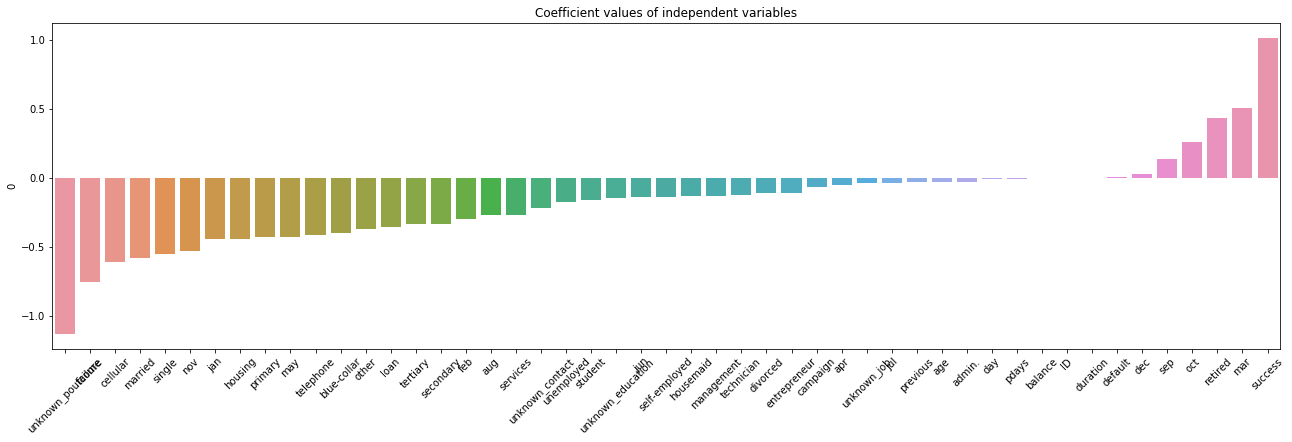

In [46]:
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression(solver='liblinear')
classifier_logistic.fit(x_train, y_train)

df_coefs = pd.DataFrame(np.round(classifier_logistic.coef_[0], 3))
df_coefs.index = x_train.columns
df_coefs_sorted = df_coefs.sort_values(by=0)

plt.figure(figsize=(22,6))
sns.barplot(x=df_coefs_sorted.index, y=df_coefs_sorted[0])
plt.title("Coefficient values of independent variables")
plt.xticks(rotation=45)

In [47]:
# Look at coefficients with large negative values
df_coefs_sorted[(df_coefs_sorted[0]<=-0.6)]

,0
unknown_poutcome,-1.131
failure,-0.751
cellular,-0.607


In [48]:
# Look at coefficients with large positive values
df_coefs_sorted[(df_coefs_sorted[0]>=0.6)]

,0
success,1.016


Discussion:
    
    Based on results above, we can see that the following 4 indpendent variables seem to have
    most impact on the dependent variable "subscribed" (using magnitude of coefficient values >= 0.6 as the filter):
    i) unknown_poutcome (category of independent variable poutcome)
    ii) success         (category of independent variable poutcome)
    iii) failure        (category of independent variable poutcome)
    iv) cellular        (category of independent variable contact)
    
    BAsed on coefficient values, it appears that if poutcome (previous outcome) was "success", then there is a strong 
    likelihood clients will subscribe to term deposit in this campaign. If poutcome was "unknown_poutcome" or "failure",
    then there is a strong likelihood that clients will NOT suscribe to term deposit in this campaign. 
    
    Similarly, it appears that if contact (method of contact) was "cellular", then there is a moderate likelihood that
    clients will NOT subscribe to term deposit in this campaign. 
    

### STATISTICAL DATA ANALYSIS

In [49]:
# Now lets look at how statistically significant the association is between the above independent variables (i.e. ones 
# with high coefficient values >=0.6 or <=-0.6) and the dependent variable. For this, we use logistic regression with 
# statsmodels since this provides us with p-values (which we can use to evaluate statistical significance between a 
# given independent variable and dependent variable)

import statsmodels.api as sm
sm.GLM(y_train, sm.add_constant(x_train), family = sm.families.Binomial()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             subscribed   No. Observations:                25317
Model:                            GLM   Df Residuals:                    25273
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5635.1
Date:                Sun, 30 Aug 2020   Deviance:                       11270.
Time:                        16:02:44   Pearson chi2:                 2.26e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.5102      0.096    -26.275      0.000      -2.697      -2.323
ID                    0.0001   3.55e-06     29.693      0.000    9.85e-05       0.000
age                  -0.0012      0.003     -0.400      0.689      -0.007       0.005
default               0.3528      0.207      1.706      0.088      -0.053       0.758
balance            8.505e-06   7.25e-06      1.173      0.241   -5.71e-06    2.27e-05
housing              -0.4795      0.061     -7.917      0.000      -0.598      -0.361
loan                 -0.2676      0.082     -3.256      0.001      -0.429      -0.107
day                   0.0121      0.003      3.603      0.000       0.005       0.019
duration              0.0046   9.35e-05     49.710      0.000       0.004       0.005
campaign             -0.0554      0.013     -4.175      0.000      -0.081      -0.029
pdays                -0.0006      0.000     -1.599      0.110      -0.001       0.000
previous              0.0181      0.014      1.312      0.190      -0.009       0.045
admin.               -0.0548      0.078     -0.703      0.482      -0.207       0.098
blue-collar          -0.3051      0.076     -4.016      0.000      -0.454      -0.156
entrepreneur         -0.1800      0.148     -1.220      0.223      -0.469       0.109
housemaid            -0.4662      0.157     -2.961      0.003      -0.775      -0.158
management           -0.1055      0.072     -1.470      0.142      -0.246       0.035
retired              -0.0088      0.113     -0.078      0.938      -0.231       0.213
self-employed        -0.1838      0.125     -1.471      0.141      -0.429       0.061
services             -0.2744      0.097     -2.817      0.005      -0.465      -0.084
student              -0.0542      0.129     -0.420      0.674      -0.307       0.199
technician           -0.0966      0.070     -1.389      0.165      -0.233       0.040
unemployed           -0.3942      0.140     -2.813      0.005      -0.669      -0.120
unknown_job          -0.3868      0.280     -1.383      0.167      -0.935       0.162
divorced             -0.7364      0.068    -10.790      0.000      -0.870      -0.603
married              -0.9582      0.049    -19.406      0.000      -1.055      -0.861
single               -0.8156      0.048    -16.849      0.000      -0.911      -0.721
primary              -0.7413      0.075     -9.937      0.000      -0.887      -0.595
secondary            -0.6409      0.050    -12.697      0.000      -0.740      -0.542
tertiary             -0.5371      0.060     -8.910      0.000      -0.655      -0.419
unknown_education    -0.5910      0.097     -6.105      0.000      -0.781      -0.401
cellular             -1.0273      0.062    -16.673      0.000      -1.148      -0.907
telephone            -1.2731      0.093    -13.699      0.000      -1.455

From results above, looking at p-values for independent variables of interest:

    Independent variable     p-value i.e P>|z|
    i) unknown_poutcome      0.00
    ii) success              0.00
    iii) failure             0.00
    iv) cellular             0.00

    Since P>|z| < 0.05 at 95% confidence level for above 4 independent variables, this implies that the null hypothesis 
    (i.e. there is no statistically signficant association between them and the dependent variable) can be rejected which
    implies that above 4 independent variables do have statistically significant association with the dependent variable
    "subscribed".


### MODEL TRAINING AND COMPARISION OF MODELS 

In [38]:
# We start with response/dependent variable as it is i.e. imbalanced (Essentially there are lot more '0's than '1's)

# First try with Logistic regression with default parameter values and look at accuracy score on test data.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier_logistic = LogisticRegression(solver='liblinear')
classifier_logistic.fit(x_train, y_train)
print(accuracy_score(classifier_logistic.predict(x_test),y_test))

0.903001579778831


In [39]:
# Use GridSearchCV to identify the best hyperparameter i.e. regularization parameter 'C' for the logistic regression model 
# using 5-fold cross-validation and look at accuracy score on test data using that best hyperparameter

from sklearn.model_selection import GridSearchCV
param_grid = {"C":np.logspace(0,6,100)}
classifier_logistic_regularized = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),param_grid=param_grid, cv=5)

classifier_logistic_regularized.fit(x_train,y_train)
print(classifier_logistic_regularized.best_params_)

y_predicted_classifier_logistic_regularized = pd.DataFrame(classifier_logistic_regularized.predict(x_test))
print(accuracy_score(y_predicted_classifier_logistic_regularized,y_test))

{'C': 1.321941148466029}
0.8971563981042654


Discussion:

    From results above, running logistic regression with default parameter values seems to yield better accuracy score

Accuracy Score:
0.8971563981042654 

Confusion Matrix:
[[5467  132]
 [ 519  212]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5599
           1       0.62      0.29      0.39       731

    accuracy                           0.90      6330
   macro avg       0.76      0.63      0.67      6330
weighted avg       0.88      0.90      0.88      6330
 

Area under curve for ROC :  0.8889475817574422
Area under curve for Precision Recall :  0.5034681929181768


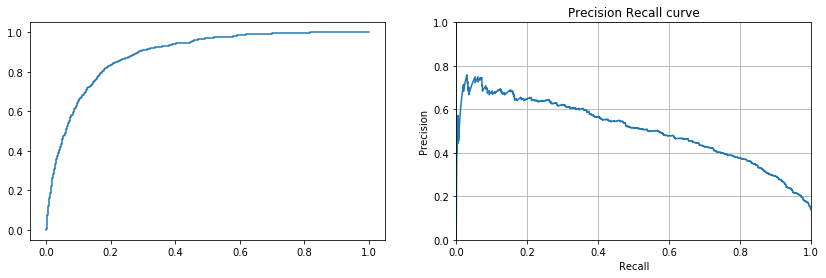

In [40]:
# Look at accuracy score, confusion matrix, classification report and Area under curves for ROC curve and Precision Recall
# curve for logistic regression model

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test,y_predicted_classifier_logistic_regularized),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_classifier_logistic_regularized),"\n")

# Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted_classifier_logistic_regularized),"\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve and its AUC (area under curve)
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_logistic = classifier_logistic_regularized.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_logistic[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve for ROC : ", metrics.roc_auc_score(y_test, y_predicted_prob_logistic[:,1]))

# Look at Precision Recall curve and its AUC (area under curve)
from sklearn import metrics
from sklearn.metrics import auc

precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_logistic[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))

Accuracy Score:
0.8971563981042654 

Confusion Matrix:
[[5415  184]
 [ 394  337]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.65      0.46      0.54       731

    accuracy                           0.91      6330
   macro avg       0.79      0.71      0.74      6330
weighted avg       0.90      0.91      0.90      6330
 

Area under curve :  0.9429692228116757
Area under curve for Precision Recall :  0.6460866726202792


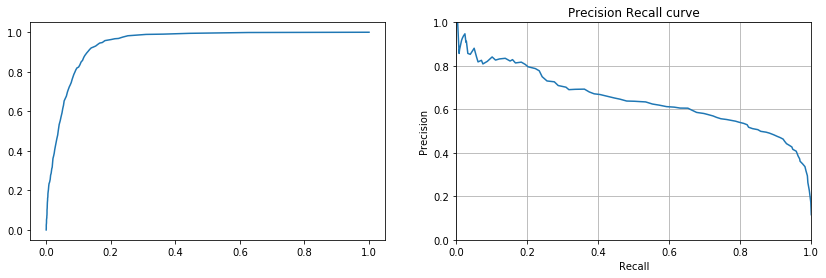

In [41]:
# Now try with RandomForest Classifier and look at the same metrics as was done for logistic regression above
from sklearn.ensemble import RandomForestClassifier
classifier_randomforest = RandomForestClassifier(random_state=0)

classifier_randomforest.fit(x_train,y_train)
y_predicted_classifier_randomforest = classifier_randomforest.predict(x_test)

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test,y_predicted_classifier_logistic_regularized),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_classifier_randomforest),"\n")

# Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted_classifier_randomforest),"\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve ands its AUC
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_randomforest = classifier_randomforest.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_randomforest[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve : ", metrics.roc_auc_score(y_test, y_predicted_prob_randomforest[:,1]))

# Look Precision Recall curve and its AUC
from sklearn.metrics import auc

precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_randomforest[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))

Accuracy Score:
0.9097946287519747 

Confusion Matrix:
[[5381  218]
 [ 353  378]] 

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5599
           1       0.63      0.52      0.57       731

    accuracy                           0.91      6330
   macro avg       0.79      0.74      0.76      6330
weighted avg       0.90      0.91      0.91      6330
 

Area under curve :  0.9412333988700835
Area under curve for Precision Recall :  0.6450751837568248


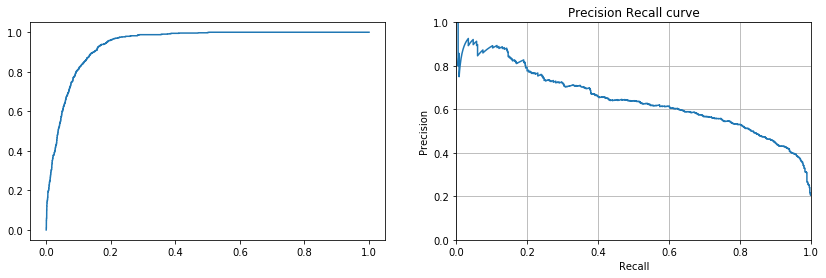

In [42]:
# Now try with Gradient Boost Classifier and look at the same metrics as was done for logistic regression above

from sklearn.ensemble import GradientBoostingClassifier
classifier_gradientboost = GradientBoostingClassifier(random_state=0)
classifier_gradientboost.fit(x_train, y_train)
y_predicted_classifier_gradientboost = classifier_gradientboost.predict(x_test)

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test,y_predicted_classifier_gradientboost),"\n")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_classifier_gradientboost),"\n")

#Classification report
print("Classification Report")
print(classification_report(y_test, y_predicted_classifier_gradientboost),"\n")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

# Look at ROC curve and its AUC
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_gradientboost = classifier_gradientboost.predict_proba(x_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_gradientboost[:,1])

ax1.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print("Area under curve : ", metrics.roc_auc_score(y_test, y_predicted_prob_gradientboost[:,1]))

# Look Precision Recall curve and its AUC
from sklearn.metrics import auc

precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_gradientboost[:,1])

ax2.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

print("Area under curve for Precision Recall : ", auc(recall, precision))

In [43]:
''' Takes too long to execute compared to other classifiers above. So commenting it out for now. 
# Now try with SVM with radial kernel 
from sklearn.svm import SVC
classifier_svm_radialkernel = SVC(kernel='rbf', random_state = 1)

classifier_svm_radialkernel.fit(x_train,y_train)
y_predicted_classifier_svm_radialkernel = classifier_svm_radialkernel.predict(x_test)

print("Accuracy Score:")
print(accuracy_score(y_test,y_predicted_classifier_svm_radialkernel),"\n")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predicted_classifier_svm_radialkernel),"\n")

print("Classification Report")
print(classification_report(y_test, y_predicted_classifier_svm_radialkernel),"\n")
'''


' Takes too long to execute compared to other classifiers above. So commenting it out for now. \n# Now try with SVM with radial kernel \nfrom sklearn.svm import SVC\nclassifier_svm_radialkernel = SVC(kernel=\'rbf\', random_state = 1)\n\nclassifier_svm_radialkernel.fit(x_train,y_train)\ny_predicted_classifier_svm_radialkernel = classifier_svm_radialkernel.predict(x_test)\n\nprint("Accuracy Score:")\nprint(accuracy_score(y_test,y_predicted_classifier_svm_radialkernel),"\n")\n\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_predicted_classifier_svm_radialkernel),"\n")\n\nprint("Classification Report")\nprint(classification_report(y_test, y_predicted_classifier_svm_radialkernel),"\n")\n'

Discussion:

    Given that dependent variable has 2 possible outcomes (1 or 0), training data was used to fit 4 different 
    types of binary classification models with their default parameters:
    i) Logistic regression model
    ii) Random forest model
    iii) Gradient Boosting model
    iv) SVM (Support vector machine) - Because of excessive runtime this was taking, this model was dropped. 
    
    Of the various metrics that can be used to evaluate/compare binary classifiers (i.e. confusion matrix, classification
    report, AUC of ROC curve, AUC of Precision Recall curve), the one I used is Area under curve for ROC curve (which 
    essentially trades off true positive rate against false positive rate for different threshhold values of the binary
    classifier). It provides a single value that can be used to compare/evaluate binary classifiers
    against each other. The higher the AUC, better the performance of the binary classifier.
    
    Furthermore, AUC for ROC curve is not sensitive to imbalance of classes in the dependent variable. So this metric
    suits well for this project since the dependent variable "subscribed" is imbalanced. 
    
    As can be seen from results above:
    i) Logistic regression AUC for ROC = 0.888
    ii) Random Forest AUC for ROC = 0.942
    iii) Gradient Boost AUC for ROC = 0.941
    
    i) Logistic regaressin AUC for Precision Recall curve = 0.503
    ii) Random Forest AUC for PRecision REcall curve = 0.646
    iii) Gradient Boost AUC for PRecision REcall curve = 0.645
   
    
    BAsed on the results above, either Random Forest or Gradient Boost model would provide the best performance 
    on the test dataset given what was learnt from the training dataset. Among the models tried, either of the two models 
    would help to identify most accurately the bank clients with current accounts that would be most open/likely to
    subscribe to an offer of term deposit from marketing team at the bank. With this information, the marketing team can
    focus their marketing efforts on just the bank clients identified by this model and hence derive higher ROI for
    their marketing efforts.

### EXPLORE TO SEE IF DIMENSION REDUCTION USING PCA ENHANCES THE MODEL PERFORMANCE

In [51]:
# On a different note, Try PCA with 3 principal components so that the 2 classes for the dependent variable can be 
# visualized in 3-D graph

from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=10)
reduced_dimensions = pca.fit_transform(df_onehot_term_deposit_marketing)

# Create a dataframe to hold pricipal components from PCA
df_pca_term_deposit_marketing = pd.DataFrame()
df_pca_term_deposit_marketing['x'] = reduced_dimensions[:,0]
df_pca_term_deposit_marketing['y'] = reduced_dimensions[:,1]
df_pca_term_deposit_marketing['z'] = reduced_dimensions[:,2]

df_pca_term_deposit_marketing['subscribed'] = df_onehot_term_deposit_marketing['subscribed']


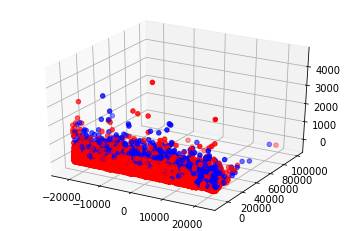

In [52]:
# Visualize in 3-D plot
import  matplotlib.colors
cmap  = matplotlib.colors.ListedColormap(['red','yellow', 'blue'])

ax = plt.axes(projection='3d')

x = df_pca_term_deposit_marketing['x']
y = df_pca_term_deposit_marketing['y']
z = df_pca_term_deposit_marketing['z']
color = df_pca_term_deposit_marketing['subscribed']

ax.scatter3D(x, y, z, c=color, cmap=cmap)
plt.show()


Text(0, 0.5, 'cumulative explained variance')

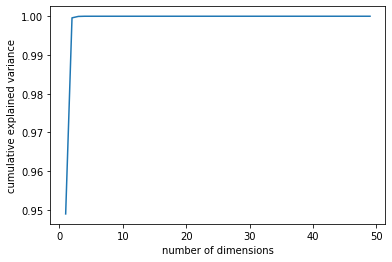

In [53]:
# Lets see how well the different principal components explain the variance

explained_variance_ratio = []

# Since there are 49 dimensions/features in the original data, loop K upto 49
for K in range(1,50):
    pca = PCA(n_components=K, random_state=10)
    pca.fit_transform(df_onehot_term_deposit_marketing)
    explained_variance_ratio.append(pca.explained_variance_ratio_)
plt.plot(range(1,50),np.cumsum(explained_variance_ratio[-1]))
plt.xlabel('number of dimensions')
plt.ylabel('cumulative explained variance')


In [54]:
# Look at cumulative explained variance
np.cumsum(explained_variance_ratio[-1])

array([0.94895178, 0.99958803, 0.99995462, 0.9999989 , 0.99999952,
       0.9999999 , 0.99999995, 0.99999998, 0.99999998, 0.99999998,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

Discussion:
    
    The first 3 principal components are sufficient to explain the data

Accuracy Score:
0.8933649289099526 

Confusion Matrix:
[[5466  133]
 [ 542  189]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5599
           1       0.59      0.26      0.36       731

    accuracy                           0.89      6330
   macro avg       0.75      0.62      0.65      6330
weighted avg       0.87      0.89      0.87      6330
 

Area under ROC curve :  0.8929631024105583


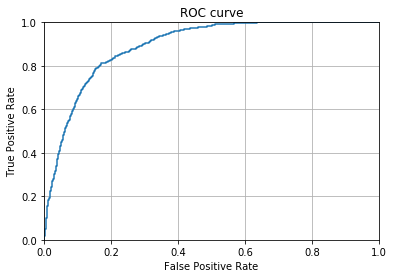

In [56]:
# Try logistic regression with just first 3 principal components

x_pca = df_pca_term_deposit_marketing[['x','y','z']]
y_pca = df_pca_term_deposit_marketing['subscribed']

x_pca_train,x_pca_test, y_pca_train,y_pca_test = train_test_split(x_pca,y_pca,test_size=0.2,random_state=42)

classifier_logistic_pca = LogisticRegression(solver='liblinear')
classifier_logistic_pca.fit(x_pca_train, y_pca_train)
y_predicted_classifier_logistic_pca = classifier_logistic_pca.predict(x_pca_test)

# Look at accuracy score, confusion matrix and classification report
print("Accuracy Score:")
print(accuracy_score(y_pca_test,y_predicted_classifier_logistic_pca),"\n")

print("Confusion Matrix:")
print(confusion_matrix(y_pca_test, y_predicted_classifier_logistic_pca),"\n")

print("Classification Report")
print(classification_report(y_pca_test, y_predicted_classifier_logistic_pca),"\n")

# Look at ROC curve
# Use predicted probabilities, not predicted label/class for roc_curve method
y_predicted_prob_logistic_pca = classifier_logistic_pca.predict_proba(x_pca_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted_prob_logistic_pca[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Look at AUC (Area under curve) metric
print("Area under ROC curve : ", metrics.roc_auc_score(y_test, y_predicted_prob_logistic_pca[:,1]))


Discussion:

    Running logistic regression with just first 3 principal components vs all the original dimensions/features increased AUC (Area under curve) measure from 0.888 to 0.893 i.e. delta of 0.005

Area under curve for Precision Recall :  0.48537342505468256


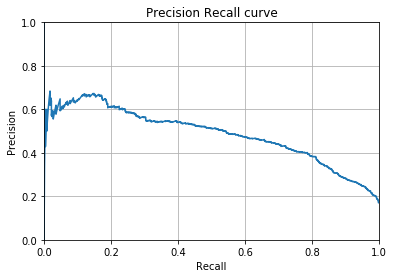

In [57]:
# Look Precision Recall curve
from sklearn.metrics import auc
from sklearn import metrics

precision, recall, thresholds1 = metrics.precision_recall_curve(y_test, y_predicted_prob_logistic_pca[:,1])

plt.plot(recall, precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

# Look at AUC (Area under curve) metric
print("Area under curve for Precision Recall : ", auc(recall, precision))


Discussion:

    Running logistic regression with just first 3 principal components vs all the original dimensions/features decreased 
    AUC (Area under curve) for Precision Recall  curve from 0.503 to 0.485 i.e. delta of -0.018.
    
    Reason I wanted to explore PCA was to see if doing so would increase the performance of the model on the test data
    set. In this case, PCA would not be appropriate since the effects achieved don't seem worth the effort of PCA. 
    
    
    